In [1]:
# Import local libraries
import importlib
import numpy as np
import time
import pandas as pd
import os

import csv_decoder  #self-defined
import save_and_load #self-defined

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%config InlineBackend. figure_format = 'retina'

In [2]:
# my_data_file_path = './High_Level_Features/higgs_highlevelfeatures_test.csv'
my_data_file_path = './BDT_Model_for_test/Data_train.csv'
# # read the data and store data in DataFrame
my_data = pd.read_csv(my_data_file_path)

pre_2CNN = np.load("./Models/2CNN_1n1c1c.npy")
pre_GBDT = np.load("./Models_origin/pre_GBDT_w_mjj.npy")

my_data["PTH"],my_data["evtweight"] = my_data["higgs_pt"],my_data["weight"]
my_data["pre_GBDT_out1"],my_data["pre_GBDT_out2"] = pre_GBDT[:,0], pre_GBDT[:,1]
my_data["pre_GBDT_out3"],my_data["pre_GBDT_out4"] = pre_GBDT[:,2], pre_GBDT[:,3]

my_data["pre_2CNN_out1"],my_data["pre_2CNN_out2"] = pre_2CNN[:,0], pre_2CNN[:,1]
my_data["pre_2CNN_out3"],my_data["pre_2CNN_out4"] = pre_2CNN[:,2], pre_2CNN[:,3]

totallist = ["higgs_pt","higgs_eta","higgs_m",
           "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
          # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
           "girth","CIJS","SIJS","DeltaEta",
           "weight","isGGH","isVBF","isVH","isttH","eventindex"]

# my_data = my_data[my_data["higgs_pt"] > 800]

ggH = my_data[my_data["isGGH"]==1]
VBF = my_data[my_data["isVBF"]==1]
VH = my_data[my_data["isVH"]==1]
ttH = my_data[my_data["isttH"]==1]
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("#",len(ggH),len(VBF),len(VH),len(ttH)))

          ggH     VBF      VH     ttH   
   #     229000  229000  229000  229000 


In [3]:
cut = 0
pt_cut = 200
axis = "pre_2CNN_out1"
ggH = my_data[(my_data["isGGH"]==1) & (my_data[axis]>=cut) & (my_data["non_higgs_leading_pt"]>=pt_cut) ]
VBF = my_data[(my_data["isVBF"]==1) & (my_data[axis]>=cut) & (my_data["non_higgs_leading_pt"]>=pt_cut) ]
VH =  my_data[(my_data["isVH"]==1) & (my_data[axis]>=cut) & (my_data["non_higgs_leading_pt"]>=pt_cut) ]
ttH = my_data[(my_data["isttH"]==1) & (my_data[axis]>=cut) & (my_data["non_higgs_leading_pt"]>=pt_cut) ]
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("#",len(ggH),len(VBF),len(VH),len(ttH)))

          ggH     VBF      VH     ttH   
   #     228761  228744  228930  224201 


In [4]:
title = ["ggF", "VBF", "VH", "ttH", "WH", "ZH"]
Higgs_PT = [ggH["higgs_pt"], VBF["higgs_pt"], VH["higgs_pt"], ttH["higgs_pt"]]#, wh_higgs_pt, zh_higgs_pt]
Higgs_m = [ggH["higgs_m"], VBF["higgs_m"], VH["higgs_m"], ttH["higgs_m"]]#, wh_higgs_mass, zh_higgs_mass]
Higgs_eta = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_higgs_eta, zh_higgs_eta]
non_Higgs_PT = [ggH["non_higgs_leading_pt"], VBF["non_higgs_leading_pt"], VH["non_higgs_leading_pt"], ttH["non_higgs_leading_pt"]]#, wh_non_higgs_leading_pt, zh_non_higgs_leading_pt]
non_Higgs_m = [ggH["non_higgs_leading_m"], VBF["non_higgs_leading_m"], VH["non_higgs_leading_m"], ttH["non_higgs_leading_m"]]#, wh_non_higgs_leading_m, zh_non_higgs_leading_m]
non_Higgs_eta = [ggH["non_higgs_leading_eta"], VBF["non_higgs_leading_eta"], VH["non_higgs_leading_eta"], ttH["non_higgs_leading_eta"]]#, wh_non_higgs_leading_eta, zh_non_higgs_leading_eta]
# non_Higgs_subleading_PT = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_non_higgs_subleading_pt, zh_non_higgs_subleading_pt]
# non_Higgs_subleading_m = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_non_higgs_subleading_m, zh_non_higgs_subleading_m]
# non_Higgs_subleading_eta = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, wh_non_higgs_subleading_eta, zh_non_higgs_subleading_eta]
# n_jet = [ggH["higgs_eta"], VBF["higgs_eta"], VH["higgs_eta"], ttH["higgs_eta"]]#, n_wh, n_zh]
GIRTH = [ggH["girth"], VBF["girth"], VH["girth"], ttH["girth"]]
C_I_J_S = [ggH["CIJS"], VBF["CIJS"], VH["CIJS"], ttH["CIJS"]]
S_I_J_S = [ggH["SIJS"], VBF["SIJS"], VH["SIJS"], ttH["SIJS"]]
DeltaEta = [ggH["DeltaEta"], VBF["DeltaEta"], VH["DeltaEta"], ttH["DeltaEta"]]
MJJ = [ggH["mjj"], VBF["mjj"], VH["mjj"], ttH["mjj"]]

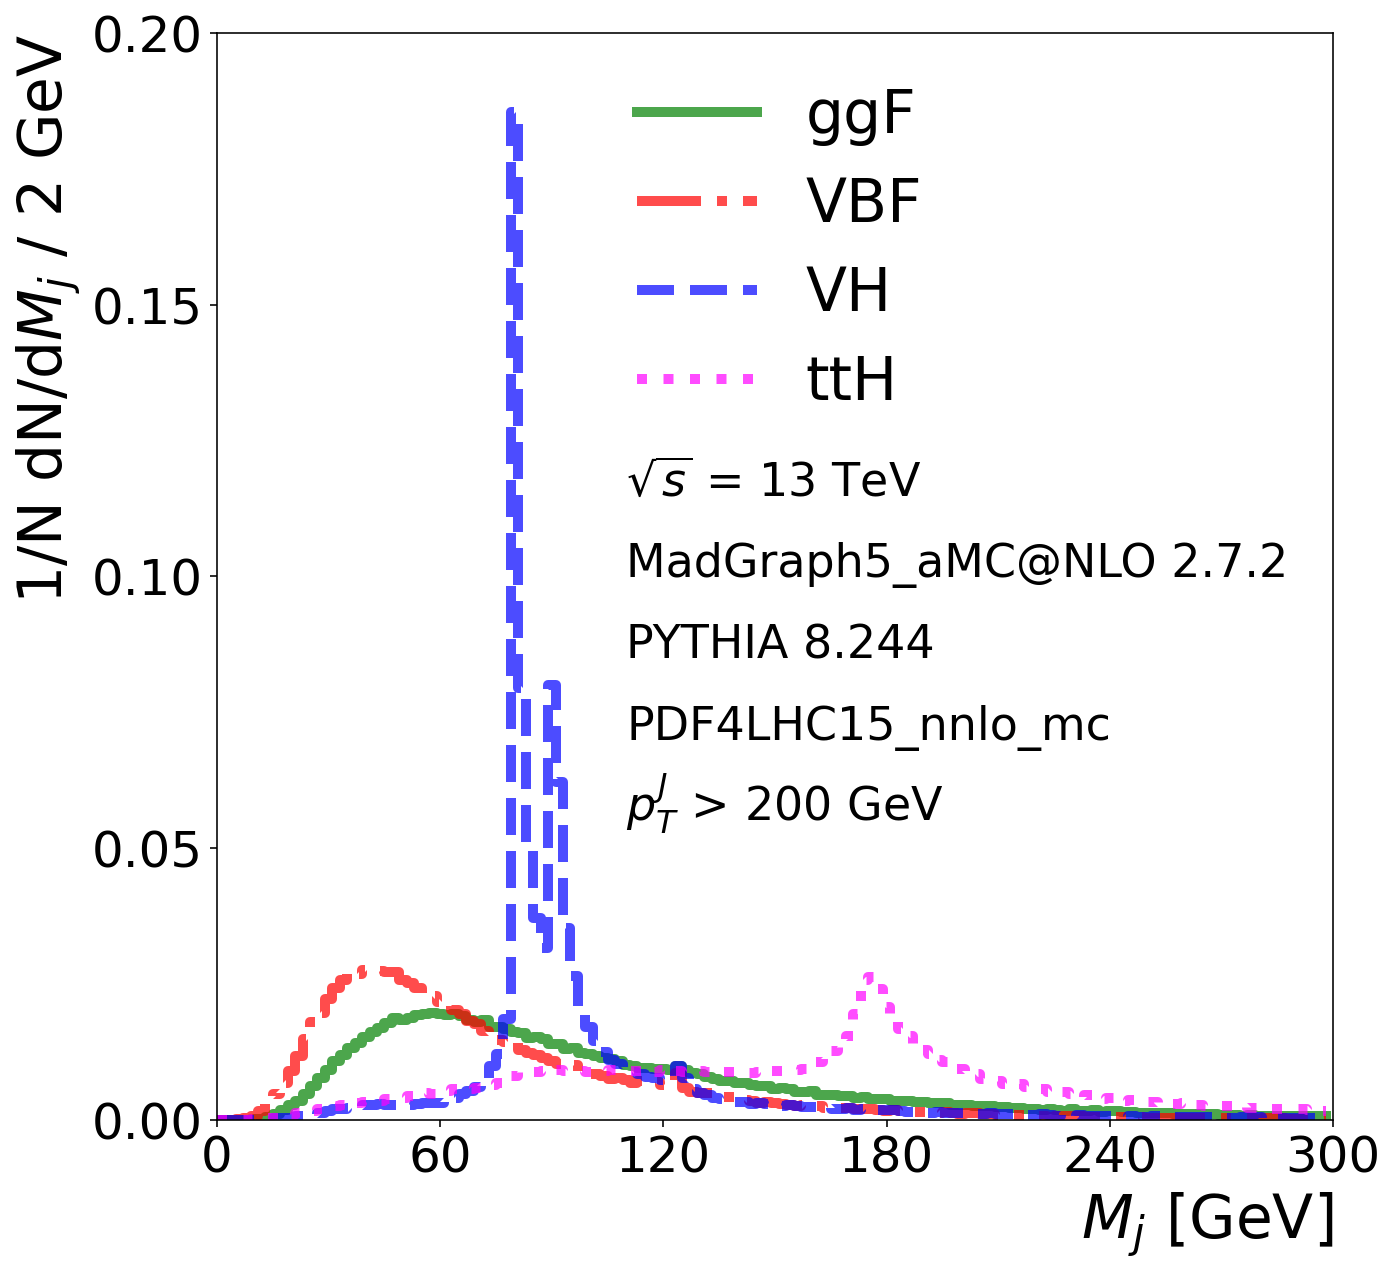

Text(0, 1, '1/N dN/d$M_{JJ}$ / 20 GeV')

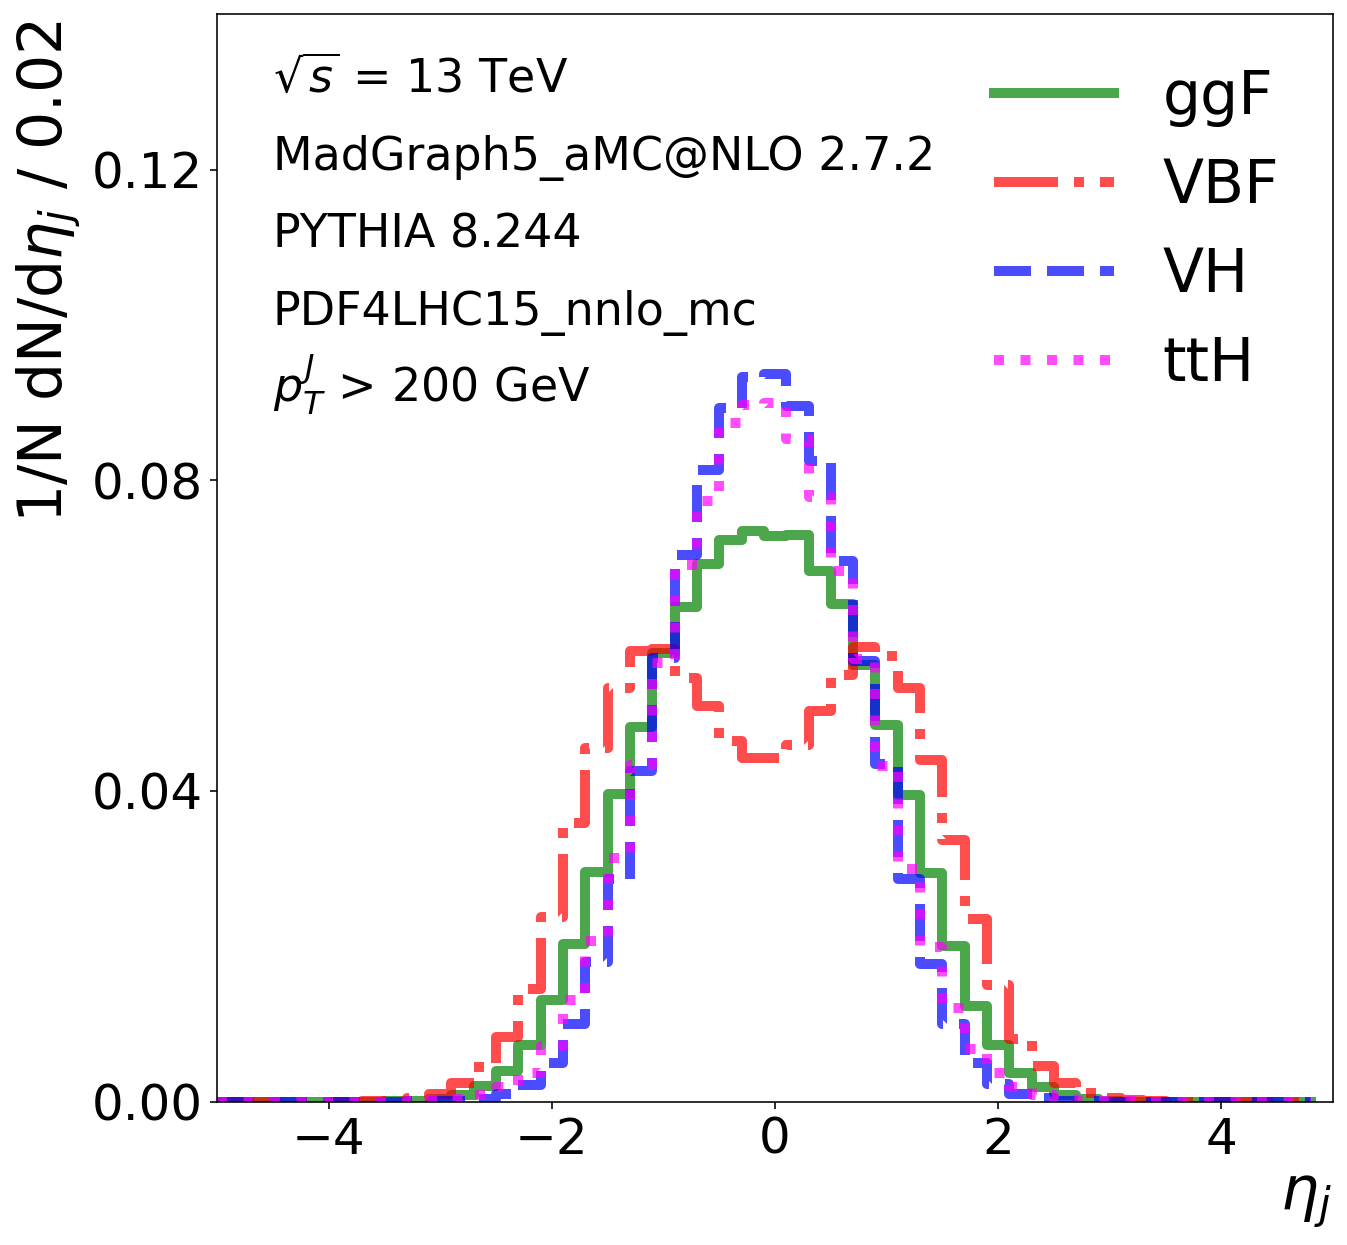

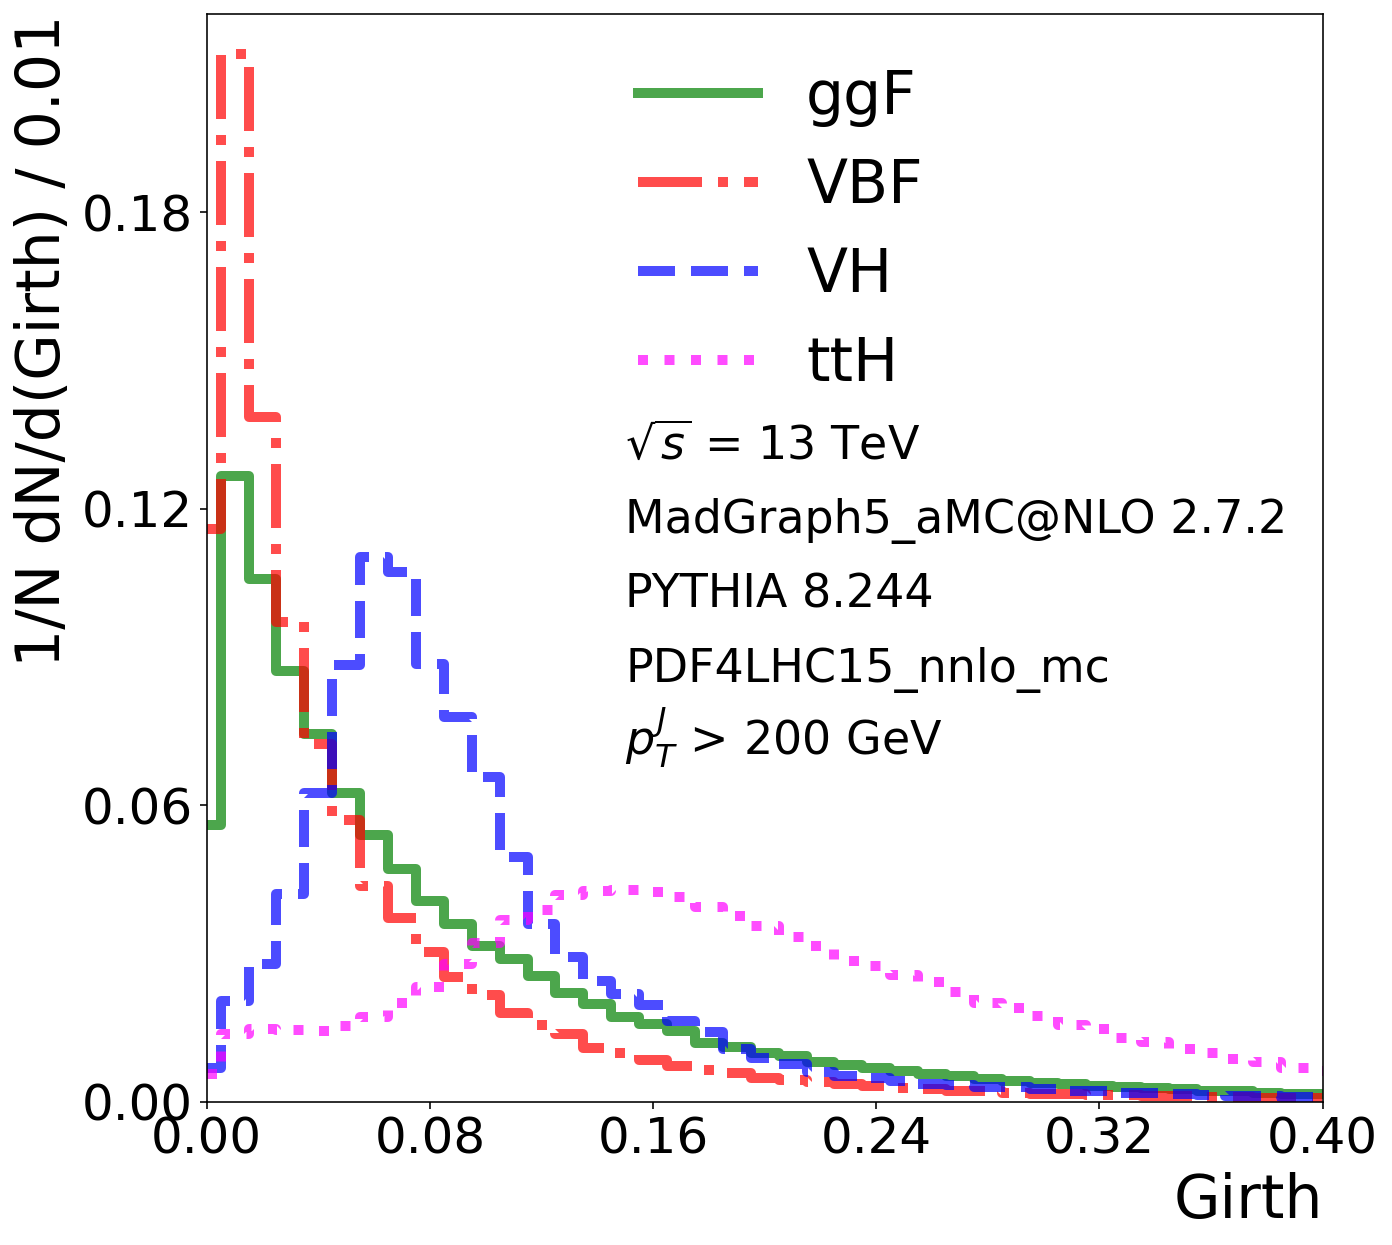

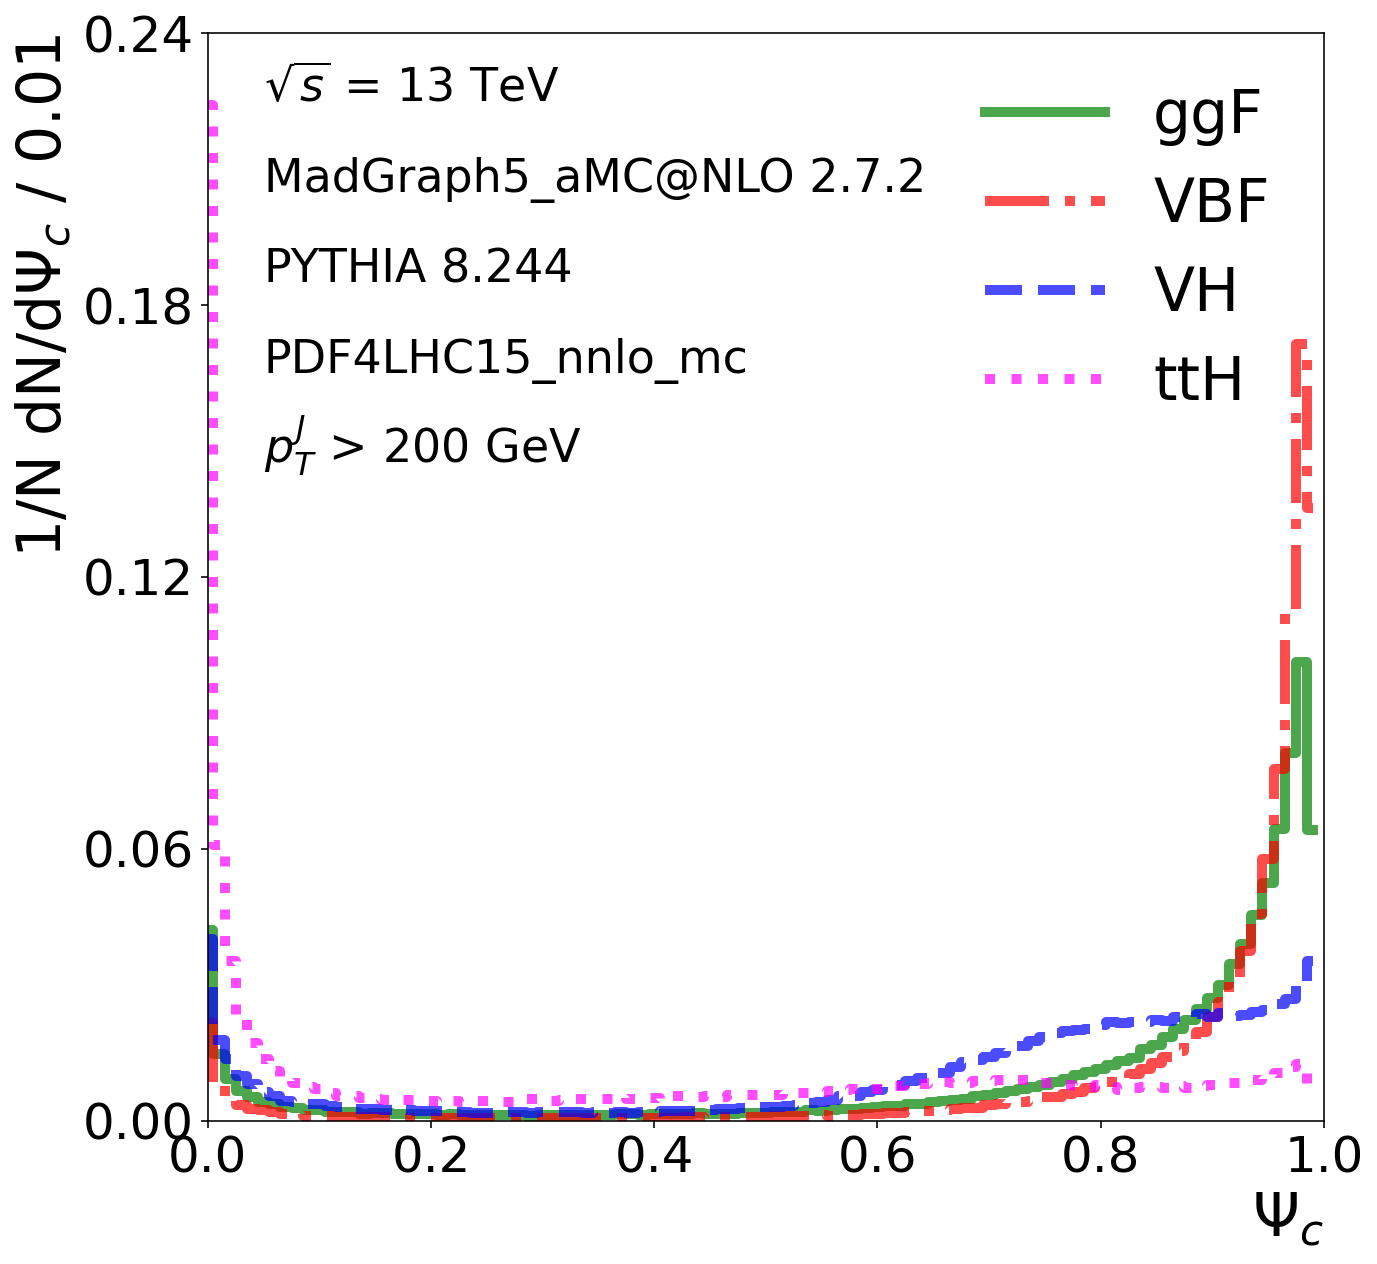

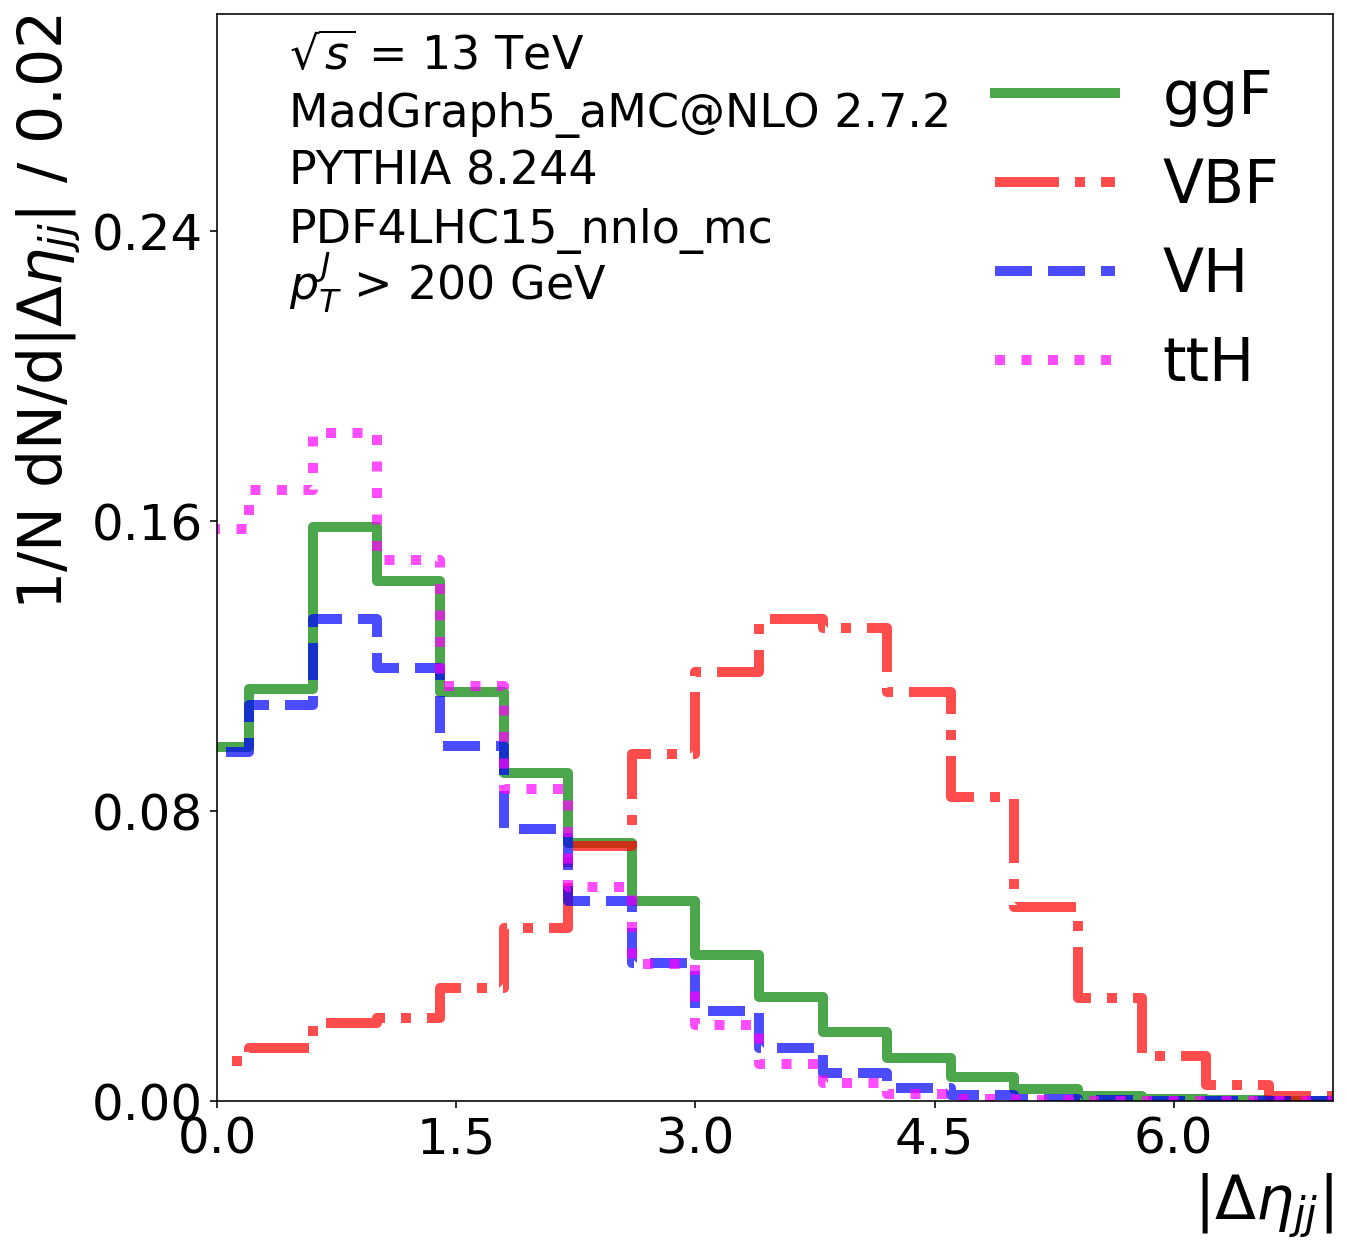

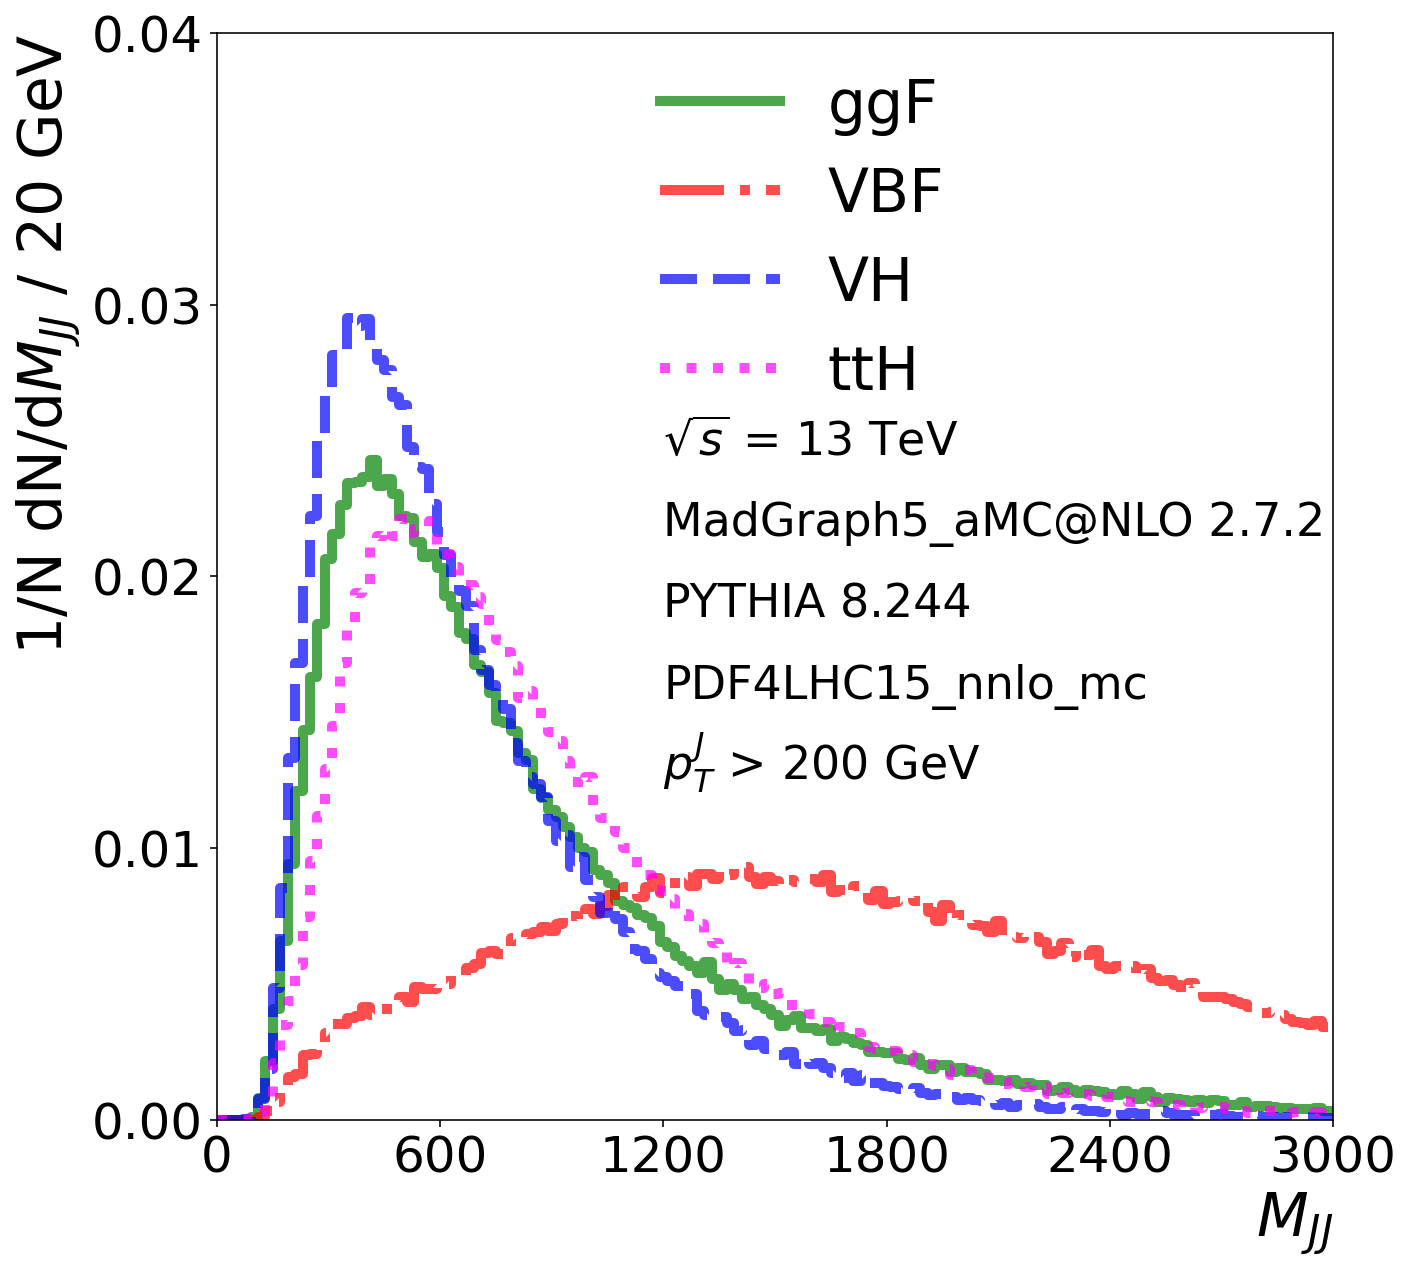

In [5]:
BDT_cut = ""#
def HIST(process, length, title, colors, linestyle, x=1, y=1):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='mid',linewidth=5, alpha=0.7, label=title[i])
    plt.legend(bbox_to_anchor=(x, y),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    

colors = ["green","red","blue","magenta"]
linestyle = ["-","-.","--",":"]
    
# fig, ax = plt.subplots(1,1, figsize=(10,8))
# for i, process in enumerate(Higgs_PT):
#     length = np.linspace(350,1250,91)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlim((400,1250))
#     plt.xlabel("$p^H_T$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.ylabel("1/N dN/d$p^H_T$ / 10 GeV",fontsize=30,horizontalalignment='right',y=1)   
# # plt.savefig("./Higgs_Pt/higgs_j_pt"+str(BDT_cut)+".pdf")


# fig, ax = plt.subplots(1,1, figsize=(10,8))
# for i, process in enumerate(Higgs_m):
#     length = np.linspace(0,200,201)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlabel("$M_J$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.xlim((50,200))
# plt.ylabel("1/N dN/d$M_J$ / 1 GeV",fontsize=30,horizontalalignment='right',y=1)   
# # plt.savefig("./Higgs_Pt/higgs_j_m"+str(BDT_cut)+".pdf")

# fig, ax = plt.subplots(1,1, figsize=(10,8))
# for i, process in enumerate(Higgs_eta):
#     length = np.linspace(-5,5,51)
#     HIST(process, length, title,colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlabel("$\eta$ ", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.xlim((-4.5,4.5)) 
# plt.ylabel("1/N dN/d$\eta$ / 0.02 ",fontsize=30,horizontalalignment='right',y=1)   
# # plt.savefig("./Higgs_Pt/higgs_j_eta"+str(BDT_cut)+".pdf")

# fig, ax = plt.subplots(1,1, figsize=(10,8))
# for i, process in enumerate(non_Higgs_PT):
#     length = np.linspace(0,1500,151)
#     HIST(process, length, title, colors[i],linestyle[i])
#     ax.tick_params(axis='x', labelsize=25)
#     ax.tick_params(axis='y', labelsize=25)
#     plt.xlabel("$p_{T_j}$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.ylim((0,0.03)) 
# plt.xlim((0,1500))    
# plt.ylabel("1/N dN/d$p_{T_j}$ / 10 GeV",fontsize=30,horizontalalignment='right',y=1)   
# # plt.savefig("./Higgs_Pt/non_higgs_j_pt"+str(BDT_cut)+".pdf")


fig, ax = plt.subplots(1,1, figsize=(10,10))
for i, process in enumerate(non_Higgs_m):
    length = np.linspace(0,300,151)
    HIST(process, length, title,colors[i],linestyle[i],x=0.68,y=1)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlabel("$M_j$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
#     plt.subplots_adjust(right=1)
    
xpoi = 110
ymax = 0.115
dy = 0.015
plt.text(x=xpoi,y=ymax, s="$\sqrt{s}$ = 13 TeV",fontsize=23)    
plt.text(x=xpoi,y=ymax-dy, s="MadGraph5_aMC@NLO 2.7.2",fontsize=23)
plt.text(x=xpoi,y=ymax-2*dy, s="PYTHIA 8.244",fontsize=23)   
plt.text(x=xpoi,y=ymax-3*dy, s="PDF4LHC15_nnlo_mc",fontsize=23)
plt.text(x=xpoi,y=ymax-4*dy, s="$p^J_T$ > 200 GeV",fontsize=23)  
    
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4)) 
    
# plt.tight_layout()
plt.xlim((0,300))
plt.ylim((0,0.2)) 
plt.ylabel("1/N dN/d$M_j$ / 2 GeV",fontsize=30,horizontalalignment='right',y=1)   
plt.show()
# plt.savefig("./Plots/non_higgs_j_m"+str(BDT_cut)+".pdf", transparent=True, bbox_inches='tight')

fig, ax = plt.subplots(1,1, figsize=(10,10))
for i, process in enumerate(non_Higgs_eta):
    length = np.linspace(-5,5,51)
    HIST(process, length, title,colors[i],linestyle[i])
    
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlabel("$\eta_j$ ", fontsize=30,horizontalalignment='right',x=1) 

xpoi = -4.5
ymax = 0.13
dy = 0.01
plt.text(x=xpoi,y=ymax, s="$\sqrt{s}$ = 13 TeV",fontsize=23)    
plt.text(x=xpoi,y=ymax-dy, s="MadGraph5_aMC@NLO 2.7.2",fontsize=23)
plt.text(x=xpoi,y=ymax-2*dy, s="PYTHIA 8.244",fontsize=23)   
plt.text(x=xpoi,y=ymax-3*dy, s="PDF4LHC15_nnlo_mc",fontsize=23)
plt.text(x=xpoi,y=ymax-4*dy, s="$p^J_T$ > 200 GeV",fontsize=23)  
    
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4)) 

plt.ylim((0,0.14))
plt.xlim((-5,5))
plt.ylabel("1/N dN/d$\eta_j$ / 0.02 ",fontsize=30,horizontalalignment='right',y=1)   
# plt.savefig("./Plots/non_higgs_j_eta"+str(BDT_cut)+".pdf", transparent=True, bbox_inches='tight')


fig, ax = plt.subplots(1,1, figsize=(10,10))
for i, process in enumerate(GIRTH):
    length = np.linspace(0,1,101)
    HIST(process, length, title,colors[i],linestyle[i], x= 0.69,y=1)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlabel("Girth", fontsize=30,horizontalalignment='right',x=1) 

xpoi = 0.15
ymax = 0.13
dy = 0.015
plt.text(x=xpoi,y=ymax, s="$\sqrt{s}$ = 13 TeV",fontsize=23)    
plt.text(x=xpoi,y=ymax-dy, s="MadGraph5_aMC@NLO 2.7.2",fontsize=23)
plt.text(x=xpoi,y=ymax-2*dy, s="PYTHIA 8.244",fontsize=23)   
plt.text(x=xpoi,y=ymax-3*dy, s="PDF4LHC15_nnlo_mc",fontsize=23)
plt.text(x=xpoi,y=ymax-4*dy, s="$p^J_T$ > 200 GeV",fontsize=23)  
    
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4))

#     plt.tight_layout()
plt.xlim((0,0.4))   
plt.ylim((0,0.22))
plt.ylabel("1/N dN/d(Girth) / 0.01",fontsize=30,horizontalalignment='right',y=1)   
# plt.savefig("./Plots/girth"+str(BDT_cut)+".pdf", transparent=True, bbox_inches='tight')


fig, ax = plt.subplots(1,1, figsize=(10,10))
for i, process in enumerate(C_I_J_S):
    length = np.linspace(0,1,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlabel("$\Psi_c$", fontsize=30,horizontalalignment='right',x=1) 

xpoi = 0.05
ymax = 0.225
dy = 0.02
plt.text(x=xpoi,y=ymax, s="$\sqrt{s}$ = 13 TeV",fontsize=23)    
plt.text(x=xpoi,y=ymax-dy, s="MadGraph5_aMC@NLO 2.7.2",fontsize=23)
plt.text(x=xpoi,y=ymax-2*dy, s="PYTHIA 8.244",fontsize=23)   
plt.text(x=xpoi,y=ymax-3*dy, s="PDF4LHC15_nnlo_mc",fontsize=23)
plt.text(x=xpoi,y=ymax-4*dy, s="$p^J_T$ > 200 GeV",fontsize=23)  
    
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4))

plt.xlim((0,1)) 
plt.ylim((0,0.24))    
plt.ylabel("1/N dN/d$\Psi_c$ / 0.01",fontsize=30,horizontalalignment='right',y=1)   
# plt.show()
# plt.savefig("./Plots/Psi_c"+str(BDT_cut)+".pdf", transparent=True, bbox_inches='tight')



fig, ax = plt.subplots(1,1, figsize=(10,10))
for i, process in enumerate(DeltaEta):
    length = np.linspace(-10,10,51)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlabel("$|\Delta\eta_{jj}|$", fontsize=30,horizontalalignment='right',x=1) 

xpoi = 0.45
ymax = 0.285
dy = 0.016
plt.text(x=xpoi,y=ymax, s="$\sqrt{s}$ = 13 TeV",fontsize=23)    
plt.text(x=xpoi,y=ymax-dy, s="MadGraph5_aMC@NLO 2.7.2",fontsize=23)
plt.text(x=xpoi,y=ymax-2*dy, s="PYTHIA 8.244",fontsize=23)   
plt.text(x=xpoi,y=ymax-3*dy, s="PDF4LHC15_nnlo_mc",fontsize=23)
plt.text(x=xpoi,y=ymax-4*dy, s="$p^J_T$ > 200 GeV",fontsize=23)  
    
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4))
    
plt.xlim((0,7)) 
plt.ylim((0,0.3)) 
plt.ylabel("1/N dN/d$|\Delta\eta_{jj}|$ / 0.02",fontsize=30,horizontalalignment='right',y=1)   
# plt.savefig("./Plots/delta_eta_eta"+str(BDT_cut)+".pdf", transparent=True, bbox_inches='tight')

fig, ax = plt.subplots(1,1, figsize=(10,10))
for i, process in enumerate(MJJ):
    length = np.linspace(0,4000,201)
    HIST(process, length, title,colors[i],linestyle[i], x= 0.7,y=1.01)
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlabel("$M_{JJ}$", fontsize=30,horizontalalignment='right',x=1) 

plt.text(x=1200,y=0.0245, s="$\sqrt{s}$ = 13 TeV",fontsize=23)    
plt.text(x=1200,y=0.0215, s="MadGraph5_aMC@NLO 2.7.2",fontsize=23)
plt.text(x=1200,y=0.0185, s="PYTHIA 8.244",fontsize=23)   
plt.text(x=1200,y=0.0155, s="PDF4LHC15_nnlo_mc",fontsize=23)
plt.text(x=1200,y=0.0125, s="$p^J_T$ > 200 GeV",fontsize=23)  

ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(4))

plt.xlim((0,3000)) 
plt.ylim((0,0.04)) 
plt.ylabel("1/N dN/d$M_{JJ}$ / 20 GeV",fontsize=30,horizontalalignment='right',y=1)   
# plt.savefig("./Plots/MJJ"+str(BDT_cut)+".pdf", transparent=True, bbox_inches='tight')



# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(n_jet):
#     plt.hist(process, 100, range=(0,100), facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("# of non-Higgs Jet", fontsize = 25)
#     plt.xlabel("", fontsize=30,horizontalalignment='right',x=1) 
    
# # plt.xlim((0,30))
# plt.ylabel("#",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# plt.savefig("./Higgs_Pt/N_non_higgs_j")


# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(non_Higgs_subleading_PT):
#     length = np.linspace(0,1500,300)
#     hist, bins = np.histogram(process, bins=length)
#     plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), where='mid',linewidth=2, alpha=0.7, label=title[i])
# #     plt.hist(process, 100, facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("non-Higgs sub-Leading Jet PT", fontsize = 25)
#     plt.xlabel("$PT$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.ylabel("1/N /5GeV",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# # plt.savefig("./non_higgs_subleading_j_pt")

# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(non_Higgs_subleading_m):
#     length = np.linspace(0,300,150)
#     hist, bins = np.histogram(process, bins=length)
#     plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), where='mid',linewidth=2, alpha=0.7, label=title[i])
# #     plt.hist(process, 100, facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("non-Higgs sub-Leading Jet Mass", fontsize = 25)
#     plt.xlabel("$M_J$ [GeV]", fontsize=30,horizontalalignment='right',x=1) 

# plt.xlim((0,200))
# plt.ylabel("1/N /2GeV",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# plt.savefig("./Higgs_Pt/non_higgs_subleading_j_m")


    
# fig = plt.figure(figsize=(10,8))
# for i, process in enumerate(non_Higgs_subleading_eta):
#     length = np.linspace(-5,5,50)
#     hist, bins = np.histogram(process, bins=length)
#     plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), where='mid',linewidth=2, alpha=0.7, label=title[i])
# #     plt.hist(process, 100, facecolor='blue', label=title[i],histtype = 'step')
#     plt.legend(ncol=1,fontsize=20, edgecolor = "w")
#     plt.title("non-Higgs sub-Leading Jet $\eta$", fontsize = 25)
#     plt.xlabel("$\eta$ ", fontsize=30,horizontalalignment='right',x=1) 
    
# plt.ylabel("1/N",fontsize=30,horizontalalignment='right',y=1)   
# # plt.show()
# plt.savefig("./Higgs_Pt/non_higgs_subleading_j_eta")